# Predicting University admissions

<br>Task: using tthe supplied predictive variables(GRE score, TOEFL score, university rating ....)</br>
    to predict the likehood of admission of a new candidate

In [23]:
#convention for libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #This is to remove warnings

In [24]:
df = pd.read_csv(r'C:\Users\marry\Desktop\Admission_Predict.csv', low_memory= False)

In [25]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [27]:
df.shape

(400, 9)

In [28]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [30]:
df.isnull().sum()#this is to check for missing data

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
#just to cjeck if there is any cateorical column
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  []
numerical variables:  ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [31]:
# find total duplicate entries and drop them if any
print(f'total duplicate rows: {df.duplicated().sum()}')

# drop duplicate rows if any
df= df[~df.duplicated()]

total duplicate rows: 0


In [35]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [39]:

df = df.drop(['Serial No.'], axis =1)

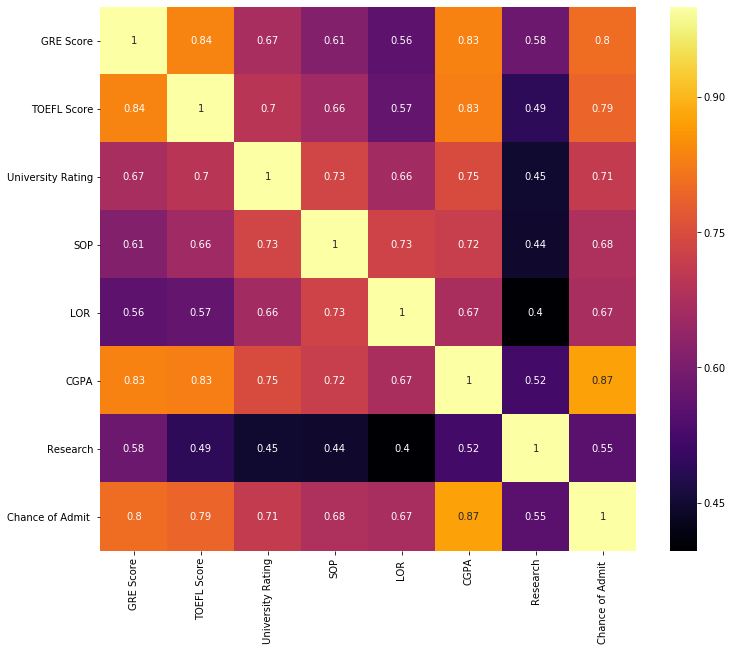

In [40]:
fig= plt.subplots(figsize =(12, 10))
corr= df.corr()
sns.heatmap(corr,cmap = 'inferno', annot= True)

its happen that the most correlated column is the primary key...``Serial_no`` to be happen honest its happens like that as student tends to sit according to serial_no

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007954E90320>,
      dtype=object)

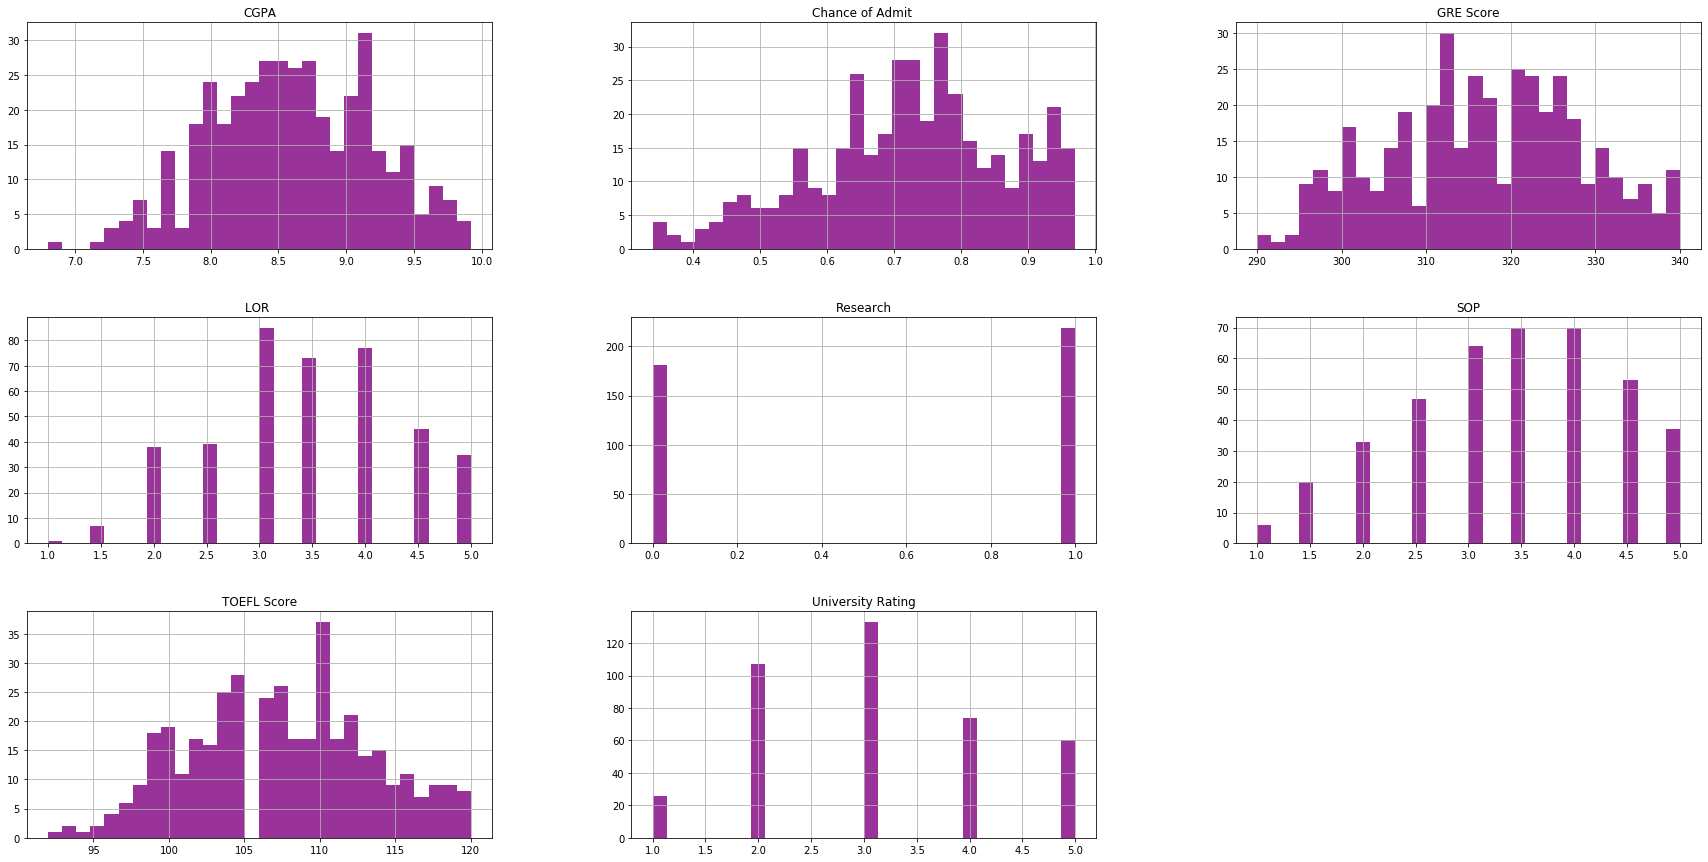

In [41]:
#let do a histogram pplot to check the distribution
df.hist(color='purple', bins=30, alpha=0.8,figsize=(30,15))

from the above distribution. it is seen that the ``CGPA`` of each student is normally distrubuted
and the highest ``university_rating`` is 3

In [49]:
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [52]:
df.groupby('GRE Score').count().head()

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,,,,,,,
290,2,2,2,2,2,2,2
293,1,1,1,1,1,1,1
294,2,2,2,2,2,2,2
295,4,4,4,4,4,4,4
296,5,5,5,5,5,5,5


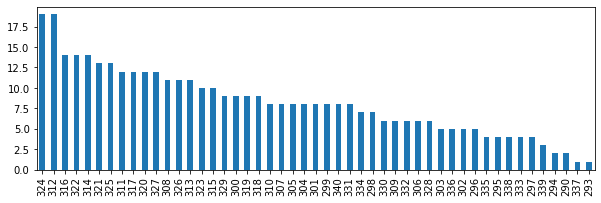

In [42]:
df['GRE Score'].value_counts().plot(kind='bar',figsize=[10,3], stacked = True)

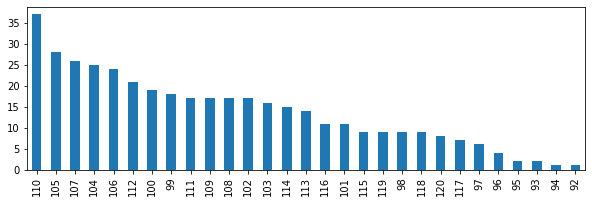

In [43]:
df['TOEFL Score'].value_counts().plot(kind='bar',figsize=[10,3], stacked = True)

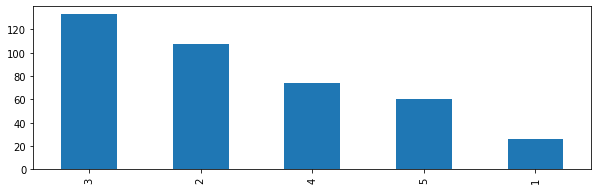

In [44]:
df['University Rating'].value_counts().plot(kind='bar',figsize=[10,3], stacked = True)

In [56]:
df['Chance of Admit']>0.65

KeyError: 'Chance of Admit'

In [50]:
df[['Chance of Admit', 'GRE Score']].groupby(['GRE Score']).max().sort_values(by='GRE Score', ascending=False)

KeyError: "['Chance of Admit'] not in index"